In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import ast
import matplotlib.pyplot as plt

## RESHAPE AND CREATE THE FRECUENCY IMG

In [2]:

df = pd.read_csv("../Examples/amr_fasta_dataset_with_fcgr.csv")
for i in range(len(df)):
    arr = np.array(ast.literal_eval(df["fcgr"][i]))
    df.at[i, "fcgr"] = arr.reshape(64,64)
    
df


,sample_id,label (not resistant[0]/resistant[1] to Trimethoprim),fcgr
0,CP133856.1,0,"[[3713.0, 3014.0, 2315.0, 2607.0, 1735.0, 1251..."
1,CP173596.1,0,"[[3681.0, 3092.0, 2312.0, 2698.0, 1687.0, 1257..."
2,CP173597.1,0,"[[67.0, 67.0, 41.0, 34.0, 30.0, 30.0, 23.0, 24..."
3,CP173595.1,0,"[[87.0, 81.0, 48.0, 54.0, 28.0, 26.0, 27.0, 33..."
4,CP173593.1,0,"[[111.0, 82.0, 78.0, 45.0, 54.0, 36.0, 33.0, 1..."
5,CP173594.1,0,"[[57.0, 47.0, 45.0, 24.0, 28.0, 17.0, 20.0, 4...."
6,CP119740.1,1,"[[3720.0, 3108.0, 2286.0, 2654.0, 1718.0, 1325..."
7,CP119741.1,1,"[[255.0, 136.0, 126.0, 126.0, 119.0, 60.0, 87...."
8,CP119742.1,1,"[[115.0, 93.0, 83.0, 61.0, 38.0, 37.0, 27.0, 3..."
9,CP119743.1,1,"[[84.0, 58.0, 40.0, 40.0, 38.0, 22.0, 54.0, 16..."


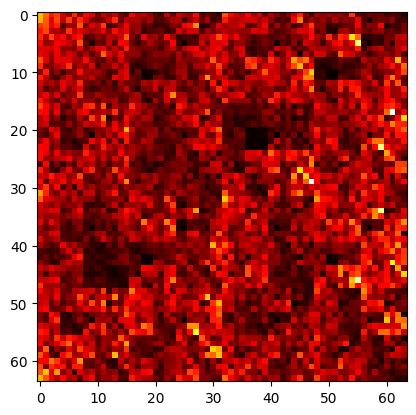

In [3]:
plot_fcgr = df["fcgr"][0]
plt.imshow(plot_fcgr, cmap='hot', interpolation='nearest', )
plt.show()

In [4]:

X = np.stack(df['fcgr'].values).astype('float32')
X = X[..., np.newaxis]  # shape: (num_samples, 64, 64, 1)


y = df["label (not resistant[0]/resistant[1] to Trimethoprim)"].astype('float32').values

# Train/test split
split = int(len(X) * 0.8)
x_train, x_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]




In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation="relu", input_shape=(64,64,1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation="relu", input_shape=(64,64,1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])



/Users/victorm/Developer/AMR.VSA-25/.venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.fit(x_train, y_train, epochs=100)


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step - accuracy: 0.5000 - loss: 4.4772
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5000 - loss: 474.1507
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5000 - loss: 257.7606
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5000 - loss: 11.3108
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5000 - loss: 107.5726
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5000 - loss: 152.5711
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5000 - loss: 154.5913
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5000 - loss: 134.6475
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5000 - loss: 103.1283
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5000 - loss: 67.9949
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5000 - loss: 37.3690
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - acc

In [7]:
print(y_test)
print(y_train)

[1. 1. 1.]
[0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1.]


In [8]:
test = model.predict(x_test)
print((test > 0.5).astype(int))

train = model.predict(x_train)
print((train > 0.5).astype(int))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
[[1]
 [1]
 [1]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
[[0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]


In [9]:
model.save("fcgr1_model.keras")

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │        12,545 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 94,085 (367.52 KB)

 Trainable params: 31,361 (122.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,724 (245.02 KB)